## Read data matrix

In [12]:
import pandas as pd
import psycopg2

# information used to create a database connection
sqluser = 'postgres'
dbname = 'mimic4'
hostname = 'localhost'
port_number = 5434
schema_name = 'omop_cdm'

# Connect to postgres with a copy of the MIMIC-III database
con = psycopg2.connect(dbname=dbname, user=sqluser, host=hostname, port=port_number, password='mysecretpassword')

# the below statement is prepended to queries to ensure they select from the right schema
query_schema = 'set search_path to ' + schema_name + ';'

dataQuery = """select * from sepsis_icd.data_matrix_1;"""
dataDf = pd.read_sql_query(dataQuery, con)
dataDf

,visit_occurrence_id,person_id,visit_occurrence_concept_name,visit_duration_hrs,visit_source_concept_name,admitting_source_value,temp_max,heartrate_max,breath_rate_vent_max,breath_rate_spon_max,...,sodium_last,bicarbonate_last,hemoglobin_last,creatinine_last,discharge_mortality,one_day_mortality,two_day_mortality,thirty_day_mortality,sixty_day_mortality,ninety_day_mortality
0,178491427,-583521349,Emergency Room - Hospital,135.0,EW EMER.,EMERGENCY ROOM,99.4,119.0,NaN,NaN,...,140.0,20.0,7.8,1.4,False,False,False,False,False,False
1,-654261412,27859096,Emergency Room - Hospital,117.0,EW EMER.,WALK-IN/SELF REFERRAL,102.7,98.0,NaN,NaN,...,136.0,30.0,10.4,NaN,False,False,False,False,False,False
2,2001570623,-1757730513,Emergency Room and Inpatient Visit,357.0,URGENT,TRANSFER FROM HOSPITAL,98.1,97.0,12.0,14.0,...,135.0,21.0,8.6,1.1,False,False,False,False,False,False
3,1654759128,-734545747,Observation Room,85.0,OBSERVATION ADMIT,TRANSFER FROM HOSPITAL,99.3,80.0,NaN,NaN,...,140.0,27.0,14.4,1.2,False,False,False,False,False,False
4,774910307,1638959654,Emergency Room - Hospital,219.0,EW EMER.,EMERGENCY ROOM,101.1,108.0,NaN,NaN,...,135.0,22.0,10.3,1.4,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17098,2063042888,-1237409032,Inpatient Visit,217.0,ELECTIVE,PHYSICIAN REFERRAL,100.1,111.0,16.0,24.0,...,136.0,27.0,9.9,1.7,False,False,False,False,False,False
17099,2065646512,-1302907960,Emergency Room - Hospital,214.0,EW EMER.,EMERGENCY ROOM,103.0,139.0,NaN,NaN,...,134.0,27.0,8.5,0.8,False,False,False,False,False,False
17100,2107129279,1264454294,Emergency Room - Hospital,385.0,EW EMER.,EMERGENCY ROOM,102.1,139.0,30.0,27.0,...,141.0,26.0,6.6,2.4,True,True,True,True,True,True
17101,2117502370,-1455939941,Emergency Room - Hospital,77.0,EW EMER.,EMERGENCY ROOM,98.9,139.0,NaN,NaN,...,144.0,19.0,8.4,1.5,False,False,False,False,False,False


## Missing data

<AxesSubplot:>

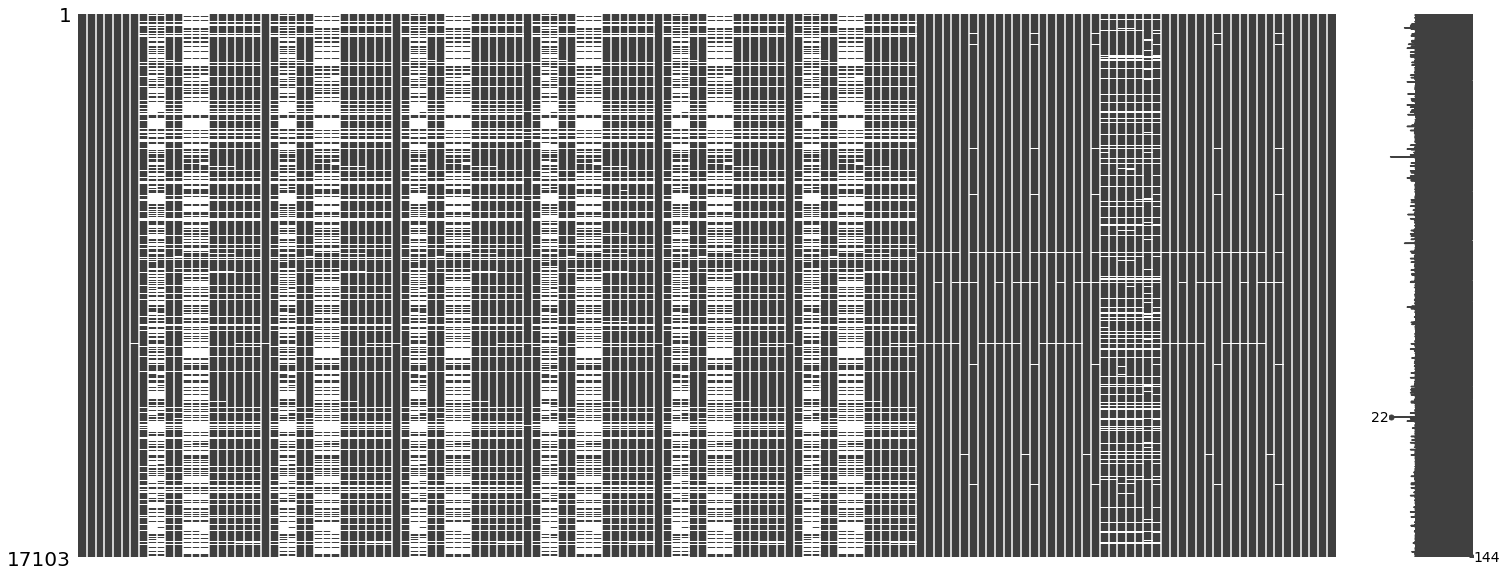

In [13]:
import missingno as msno

msno.matrix(dataDf)

<AxesSubplot:>

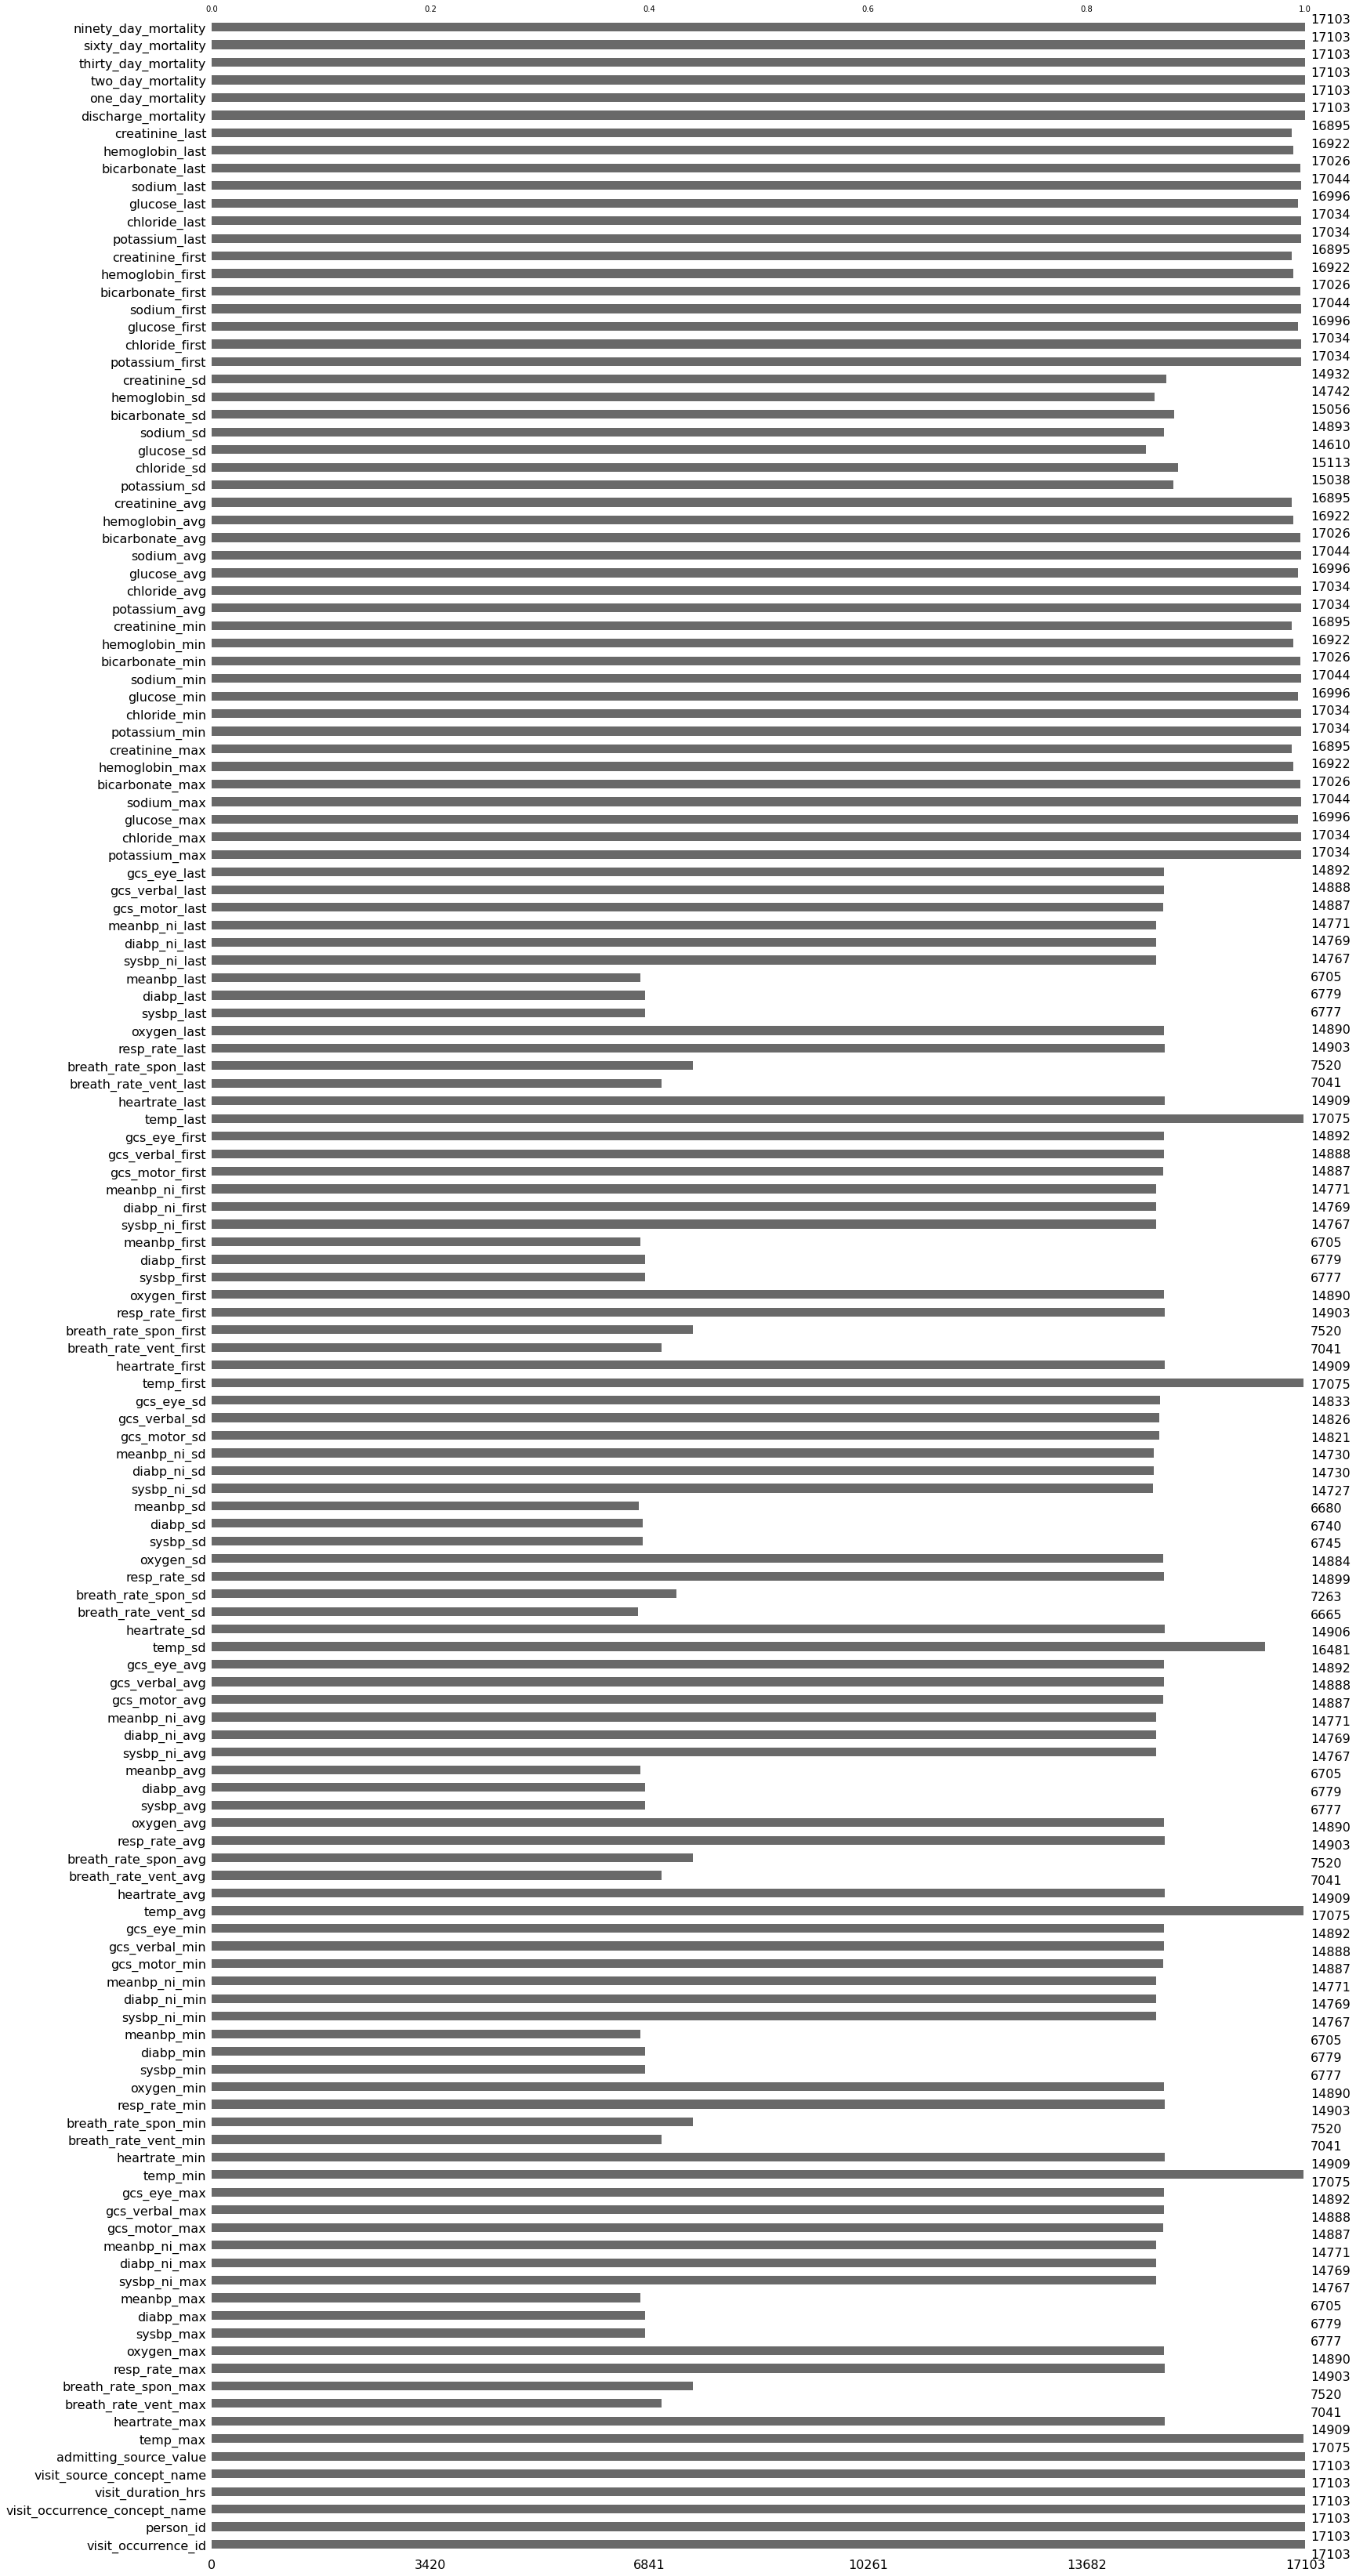

In [14]:
import missingno as msno

msno.bar(dataDf)

## One-hot-encode categorical columns

In [15]:
for catCol in ['visit_occurrence_concept_name', 'visit_source_concept_name', 'admitting_source_value']:
    dummyDf = pd.get_dummies(dataDf[catCol])
    dataDf.drop(catCol, axis = 1, inplace=True)
    dataDf = dataDf.join(dummyDf)
dataDf

,visit_occurrence_id,person_id,visit_duration_hrs,temp_max,heartrate_max,breath_rate_vent_max,breath_rate_spon_max,resp_rate_max,oxygen_max,sysbp_max,...,CLINIC REFERRAL,EMERGENCY ROOM,INFORMATION NOT AVAILABLE,INTERNAL TRANSFER TO OR FROM PSYCH,PACU,PHYSICIAN REFERRAL,PROCEDURE SITE,TRANSFER FROM HOSPITAL,TRANSFER FROM SKILLED NURSING FACILITY,WALK-IN/SELF REFERRAL
0,178491427,-583521349,135.0,99.4,119.0,NaN,NaN,27.0,100.0,NaN,...,0,1,0,0,0,0,0,0,0,0
1,-654261412,27859096,117.0,102.7,98.0,NaN,NaN,38.0,100.0,NaN,...,0,0,0,0,0,0,0,0,0,1
2,2001570623,-1757730513,357.0,98.1,97.0,12.0,14.0,24.0,100.0,135.0,...,0,0,0,0,0,0,0,1,0,0
3,1654759128,-734545747,85.0,99.3,80.0,NaN,NaN,26.0,100.0,NaN,...,0,0,0,0,0,0,0,1,0,0
4,774910307,1638959654,219.0,101.1,108.0,NaN,NaN,35.0,100.0,NaN,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17098,2063042888,-1237409032,217.0,100.1,111.0,16.0,24.0,34.0,100.0,150.0,...,0,0,0,0,0,1,0,0,0,0
17099,2065646512,-1302907960,214.0,103.0,139.0,NaN,NaN,24.0,100.0,NaN,...,0,1,0,0,0,0,0,0,0,0
17100,2107129279,1264454294,385.0,102.1,139.0,30.0,27.0,39.0,100.0,168.0,...,0,1,0,0,0,0,0,0,0,0
17101,2117502370,-1455939941,77.0,98.9,139.0,NaN,NaN,28.0,100.0,150.0,...,0,1,0,0,0,0,0,0,0,0


## Standardise data

In [16]:
cols = ["visit_duration_hrs", "temp_max", "heartrate_max", "breath_rate_vent_max", "breath_rate_spon_max", "resp_rate_max", "oxygen_max", "sysbp_max", "diabp_max", "meanbp_max", "sysbp_ni_max", "diabp_ni_max", "meanbp_ni_max", "gcs_motor_max", "gcs_verbal_max", "gcs_eye_max", "temp_min", "heartrate_min", "breath_rate_vent_min", "breath_rate_spon_min", "resp_rate_min", "oxygen_min", "sysbp_min", "diabp_min", "meanbp_min", "sysbp_ni_min", "diabp_ni_min", "meanbp_ni_min", "gcs_motor_min", "gcs_verbal_min", "gcs_eye_min", "temp_avg", "heartrate_avg", "breath_rate_vent_avg", "breath_rate_spon_avg", "resp_rate_avg", "oxygen_avg", "sysbp_avg", "diabp_avg", "meanbp_avg", "sysbp_ni_avg", "diabp_ni_avg", "meanbp_ni_avg", "gcs_motor_avg", "gcs_verbal_avg", "gcs_eye_avg", "temp_sd", "heartrate_sd", "breath_rate_vent_sd", "breath_rate_spon_sd", "resp_rate_sd", "oxygen_sd", "sysbp_sd", "diabp_sd", "meanbp_sd", "sysbp_ni_sd", "diabp_ni_sd", "meanbp_ni_sd", "gcs_motor_sd", "gcs_verbal_sd", "gcs_eye_sd", "temp_first", "heartrate_first", "breath_rate_vent_first", "breath_rate_spon_first", "resp_rate_first", "oxygen_first", "sysbp_first", "diabp_first", "meanbp_first", "sysbp_ni_first", "diabp_ni_first", "meanbp_ni_first", "gcs_motor_first", "gcs_verbal_first", "gcs_eye_first", "temp_last", "heartrate_last", "breath_rate_vent_last", "breath_rate_spon_last", "resp_rate_last", "oxygen_last", "sysbp_last", "diabp_last", "meanbp_last", "sysbp_ni_last", "diabp_ni_last", "meanbp_ni_last", "gcs_motor_last", "gcs_verbal_last", "gcs_eye_last", "potassium_max", "chloride_max", "glucose_max", "sodium_max", "bicarbonate_max", "hemoglobin_max", "creatinine_max", "potassium_min", "chloride_min", "glucose_min", "sodium_min", "bicarbonate_min", "hemoglobin_min", "creatinine_min", "potassium_avg", "chloride_avg", "glucose_avg", "sodium_avg", "bicarbonate_avg", "hemoglobin_avg", "creatinine_avg", "potassium_sd", "chloride_sd", "glucose_sd", "sodium_sd", "bicarbonate_sd", "hemoglobin_sd", "creatinine_sd", "potassium_first", "chloride_first", "glucose_first", "sodium_first", "bicarbonate_first", "hemoglobin_first", "creatinine_first", "potassium_last", "chloride_last", "glucose_last", "sodium_last", "bicarbonate_last", "hemoglobin_last", "creatinine_last"]

In [17]:
from sklearn.preprocessing import StandardScaler

data = StandardScaler().fit_transform(dataDf[cols])
standardDf = pd.DataFrame(data, columns = cols)
standardDf

,visit_duration_hrs,temp_max,heartrate_max,breath_rate_vent_max,breath_rate_spon_max,resp_rate_max,oxygen_max,sysbp_max,diabp_max,meanbp_max,...,bicarbonate_first,hemoglobin_first,creatinine_first,potassium_last,chloride_last,glucose_last,sodium_last,bicarbonate_last,hemoglobin_last,creatinine_last
0,-0.414670,0.376345,0.308333,NaN,NaN,-0.718295,0.352638,NaN,NaN,NaN,...,-0.662402,-0.898266,0.281866,0.386638,1.235233,-1.114446,0.262698,-0.782719,-1.090125,-0.001856
1,-0.458463,0.529052,-0.737820,NaN,NaN,1.238081,0.352638,NaN,NaN,NaN,...,1.355509,0.295387,NaN,1.648807,-1.995822,-0.699689,-0.563928,1.089920,0.340462,NaN
2,0.125437,0.316188,-0.787636,-1.398466,-0.676104,-1.251853,0.352638,-0.836755,-0.856736,-0.869981,...,-0.057029,-1.136997,-0.403912,1.107878,0.104363,0.192037,-0.770585,-0.595455,-0.649944,-0.257474
3,-0.536316,0.371717,-1.634522,NaN,NaN,-0.896148,0.352638,NaN,NaN,NaN,...,0.346553,1.918757,-0.146745,0.747258,-0.703400,-0.388622,0.262698,0.528128,2.541365,-0.172268
4,-0.210305,0.455012,-0.239652,NaN,NaN,0.704524,0.352638,NaN,NaN,NaN,...,-0.460611,0.534118,0.110422,0.206329,0.265916,0.337202,-0.770585,-0.408192,0.285440,-0.001856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17098,-0.215171,0.408737,-0.090201,-0.722096,0.138362,0.526671,0.352638,-0.152000,0.621198,1.591149,...,-0.258820,1.775518,0.024699,-0.334601,-0.380295,0.254251,-0.563928,0.528128,0.065349,0.253762
17099,-0.222470,0.542934,1.304669,NaN,NaN,-1.251853,0.352638,NaN,NaN,NaN,...,0.548344,-0.277566,-0.489634,0.026019,-0.218742,-0.305671,-0.977241,0.528128,-0.704967,-0.513092
17100,0.193559,0.501287,1.304669,1.645200,0.382702,1.415933,0.352638,0.669707,-0.856736,-0.342596,...,-0.258820,1.107072,-0.061023,2.730667,0.427469,-0.907068,0.469354,0.340864,-1.750396,0.850204
17101,-0.555779,0.353207,1.304669,NaN,NaN,-0.540443,0.352638,-0.152000,0.932342,-0.283998,...,-0.460611,-0.325313,1.310534,-1.777080,2.204549,-0.222719,1.089323,-0.969983,-0.759989,0.083350


In [18]:
dataDf = dataDf.drop(cols, axis = 1).join(standardDf)
dataDf

,visit_occurrence_id,person_id,discharge_mortality,one_day_mortality,two_day_mortality,thirty_day_mortality,sixty_day_mortality,ninety_day_mortality,Ambulatory Clinic / Center,Ambulatory Surgical Center,...,bicarbonate_first,hemoglobin_first,creatinine_first,potassium_last,chloride_last,glucose_last,sodium_last,bicarbonate_last,hemoglobin_last,creatinine_last
0,178491427,-583521349,False,False,False,False,False,False,0,0,...,-0.662402,-0.898266,0.281866,0.386638,1.235233,-1.114446,0.262698,-0.782719,-1.090125,-0.001856
1,-654261412,27859096,False,False,False,False,False,False,0,0,...,1.355509,0.295387,NaN,1.648807,-1.995822,-0.699689,-0.563928,1.089920,0.340462,NaN
2,2001570623,-1757730513,False,False,False,False,False,False,0,0,...,-0.057029,-1.136997,-0.403912,1.107878,0.104363,0.192037,-0.770585,-0.595455,-0.649944,-0.257474
3,1654759128,-734545747,False,False,False,False,False,False,0,0,...,0.346553,1.918757,-0.146745,0.747258,-0.703400,-0.388622,0.262698,0.528128,2.541365,-0.172268
4,774910307,1638959654,False,False,False,False,False,False,0,0,...,-0.460611,0.534118,0.110422,0.206329,0.265916,0.337202,-0.770585,-0.408192,0.285440,-0.001856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17098,2063042888,-1237409032,False,False,False,False,False,False,0,0,...,-0.258820,1.775518,0.024699,-0.334601,-0.380295,0.254251,-0.563928,0.528128,0.065349,0.253762
17099,2065646512,-1302907960,False,False,False,False,False,False,0,0,...,0.548344,-0.277566,-0.489634,0.026019,-0.218742,-0.305671,-0.977241,0.528128,-0.704967,-0.513092
17100,2107129279,1264454294,True,True,True,True,True,True,0,0,...,-0.258820,1.107072,-0.061023,2.730667,0.427469,-0.907068,0.469354,0.340864,-1.750396,0.850204
17101,2117502370,-1455939941,False,False,False,False,False,False,0,0,...,-0.460611,-0.325313,1.310534,-1.777080,2.204549,-0.222719,1.089323,-0.969983,-0.759989,0.083350


In [41]:
dataDf['discharge_mortality'] = dataDf['discharge_mortality'].apply(lambda x: 1 if x else 0)
dataDf['one_day_mortality'] = dataDf['one_day_mortality'].apply(lambda x: 1 if x else 0)
dataDf['two_day_mortality'] = dataDf['two_day_mortality'].apply(lambda x: 1 if x else 0)
dataDf['thirty_day_mortality'] = dataDf['thirty_day_mortality'].apply(lambda x: 1 if x else 0)
dataDf['sixty_day_mortality'] = dataDf['sixty_day_mortality'].apply(lambda x: 1 if x else 0)
dataDf['ninety_day_mortality'] = dataDf['ninety_day_mortality'].apply(lambda x: 1 if x else 0)

In [42]:
dataDf

,visit_occurrence_id,person_id,discharge_mortality,one_day_mortality,two_day_mortality,thirty_day_mortality,sixty_day_mortality,ninety_day_mortality,Ambulatory Clinic / Center,Ambulatory Surgical Center,...,bicarbonate_first,hemoglobin_first,creatinine_first,potassium_last,chloride_last,glucose_last,sodium_last,bicarbonate_last,hemoglobin_last,creatinine_last
0,178491427,-583521349,0,0,0,0,0,0,0,0,...,-0.662402,-0.898266,0.281866,0.386638,1.235233,-1.114446,0.262698,-0.782719,-1.090125,-0.001856
1,-654261412,27859096,0,0,0,0,0,0,0,0,...,1.355509,0.295387,NaN,1.648807,-1.995822,-0.699689,-0.563928,1.089920,0.340462,NaN
2,2001570623,-1757730513,0,0,0,0,0,0,0,0,...,-0.057029,-1.136997,-0.403912,1.107878,0.104363,0.192037,-0.770585,-0.595455,-0.649944,-0.257474
3,1654759128,-734545747,0,0,0,0,0,0,0,0,...,0.346553,1.918757,-0.146745,0.747258,-0.703400,-0.388622,0.262698,0.528128,2.541365,-0.172268
4,774910307,1638959654,0,0,0,0,0,0,0,0,...,-0.460611,0.534118,0.110422,0.206329,0.265916,0.337202,-0.770585,-0.408192,0.285440,-0.001856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17098,2063042888,-1237409032,0,0,0,0,0,0,0,0,...,-0.258820,1.775518,0.024699,-0.334601,-0.380295,0.254251,-0.563928,0.528128,0.065349,0.253762
17099,2065646512,-1302907960,0,0,0,0,0,0,0,0,...,0.548344,-0.277566,-0.489634,0.026019,-0.218742,-0.305671,-0.977241,0.528128,-0.704967,-0.513092
17100,2107129279,1264454294,1,1,1,1,1,1,0,0,...,-0.258820,1.107072,-0.061023,2.730667,0.427469,-0.907068,0.469354,0.340864,-1.750396,0.850204
17101,2117502370,-1455939941,0,0,0,0,0,0,0,0,...,-0.460611,-0.325313,1.310534,-1.777080,2.204549,-0.222719,1.089323,-0.969983,-0.759989,0.083350


## Test/Train split

In [45]:
X = dataDf.drop(['visit_occurrence_id', 'person_id', 'discharge_mortality', 'one_day_mortality', 'two_day_mortality', 'thirty_day_mortality', 'sixty_day_mortality', 'ninety_day_mortality'], axis = 1)
y_discharge = dataDf['discharge_mortality']
y_one_day = dataDf['one_day_mortality']
y_two_day = dataDf['two_day_mortality']
y_thirty_day = dataDf['thirty_day_mortality']
y_sixty_day = dataDf['sixty_day_mortality']
y_ninety_day = dataDf['ninety_day_mortality']

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_discharge_train, y_discharge_test, y_one_day_train, y_one_day_test, y_two_day_train, y_two_day_test, y_thirty_day_train, y_thirty_day_test, y_sixty_day_train, y_sixty_day_test, y_ninety_day_train, y_ninety_day_test = train_test_split(X, y_discharge, y_one_day, y_two_day, y_thirty_day, y_sixty_day, y_ninety_day, test_size=0.2, random_state=42)

In [100]:
X_train.shape, X_test.shape

((13682, 159), (3421, 159))

In [101]:
y_discharge_train.shape, y_discharge_test.shape

((13682,), (3421,))

In [102]:
y_one_day_train.shape, y_one_day_test.shape

((13682,), (3421,))

In [103]:
y_two_day_train.shape, y_two_day_test.shape

((13682,), (3421,))

In [104]:
y_thirty_day_train.shape, y_thirty_day_test.shape

((13682,), (3421,))

In [105]:
y_sixty_day_train.shape, y_sixty_day_test.shape

((13682,), (3421,))

In [106]:
y_ninety_day_train.shape, y_ninety_day_test.shape

((13682,), (3421,))

## XGBoost

In [107]:
from xgboost import XGBClassifier

In [108]:
xgb = XGBClassifier()
xgb.fit(X_train, y_discharge_train)
y_discharge_pred = xgb.predict(X_test)

[09:12:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [109]:
xgb = XGBClassifier()
xgb.fit(X_train, y_one_day_train)
y_one_day_pred = xgb.predict(X_test)

[09:12:03] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [110]:
xgb = XGBClassifier()
xgb.fit(X_train, y_two_day_train)
y_two_day_pred = xgb.predict(X_test)

[09:12:05] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [111]:
xgb = XGBClassifier()
xgb.fit(X_train, y_thirty_day_train)
y_thirty_day_pred = xgb.predict(X_test)

[09:12:08] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [112]:
xgb = XGBClassifier()
xgb.fit(X_train, y_sixty_day_train)
y_sixty_day_pred = xgb.predict(X_test)

[09:12:10] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [113]:
xgb = XGBClassifier()
xgb.fit(X_train, y_ninety_day_train)
y_ninety_day_pred = xgb.predict(X_test)

[09:12:13] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [114]:
from sklearn.metrics import accuracy_score

print('Discharge mortality: ', str(accuracy_score(y_discharge_pred, y_discharge_test)))
print('One day mortality: ', str(accuracy_score(y_one_day_pred, y_one_day_test)))
print('Two day mortality: ', str(accuracy_score(y_two_day_pred, y_two_day_test)))
print('Thirty day mortality: ', str(accuracy_score(y_thirty_day_pred, y_thirty_day_test)))
print('Sixty day mortality: ', str(accuracy_score(y_sixty_day_pred, y_sixty_day_test)))
print('Ninety day mortality: ', str(accuracy_score(y_ninety_day_pred, y_ninety_day_test)))

Discharge mortality:  0.9409529377375037
One day mortality:  0.9421221864951769
Two day mortality:  0.9406606255480854
Thirty day mortality:  0.9391990646009939
Sixty day mortality:  0.92955276235019
Ninety day mortality:  0.9289681379713534


In [115]:
from sklearn.metrics import roc_auc_score

print('Discharge mortality ROC: ', str(roc_auc_score(y_discharge_pred, y_discharge_test)))
print('One day mortality ROC: ', str(roc_auc_score(y_one_day_pred, y_one_day_test)))
print('Two day mortality ROC: ', str(roc_auc_score(y_two_day_pred, y_two_day_test)))
print('Thirty day mortality ROC: ', str(roc_auc_score(y_thirty_day_pred, y_thirty_day_test)))
print('Sixty day mortality ROC: ', str(roc_auc_score(y_sixty_day_pred, y_sixty_day_test)))
print('Ninety day mortality ROC: ', str(roc_auc_score(y_sixty_day_pred, y_sixty_day_test)))

Discharge mortality ROC:  0.9227498186057024
One day mortality ROC:  0.9263307877498608
Two day mortality ROC:  0.9237993714397434
Thirty day mortality ROC:  0.9244051957945061
Sixty day mortality ROC:  0.9104808653406581
Ninety day mortality ROC:  0.9104808653406581


In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, labels, ymap=None, figsize=(10,10), title='Confusion Matrix for the classifier'):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    #plt.savefig(filename)
    plt.title(title)
    plt.show()

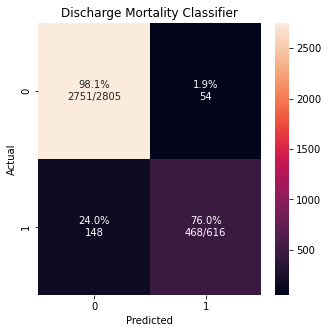

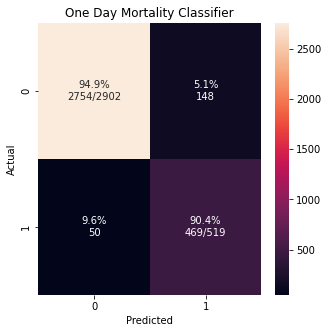

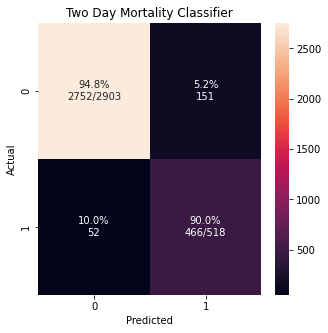

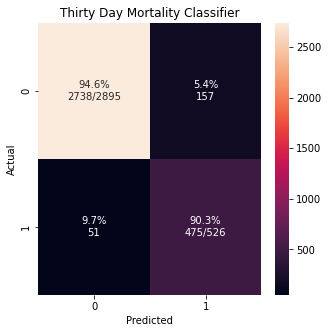

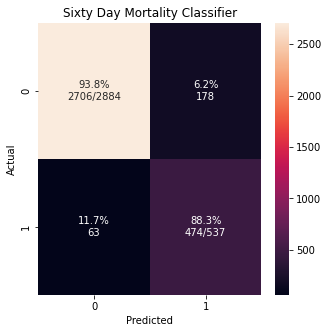

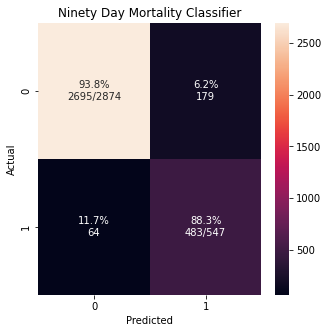

In [117]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

labels = [0, 1]

cm_analysis(y_discharge_test, y_discharge_pred, labels, ymap=None, figsize=(5, 5), title='Discharge Mortality Classifier')

cm_analysis(y_one_day_pred, y_one_day_test, labels, ymap=None, figsize=(5, 5), title='One Day Mortality Classifier')

cm_analysis(y_two_day_pred, y_two_day_test, labels, ymap=None, figsize=(5, 5), title='Two Day Mortality Classifier')

cm_analysis(y_thirty_day_pred, y_thirty_day_test, labels, ymap=None, figsize=(5, 5), title='Thirty Day Mortality Classifier')

cm_analysis(y_sixty_day_pred, y_sixty_day_test, labels, ymap=None, figsize=(5, 5), title='Sixty Day Mortality Classifier')

cm_analysis(y_ninety_day_pred, y_ninety_day_test, labels, ymap=None, figsize=(5, 5), title='Ninety Day Mortality Classifier')